## Fashion MNIST Classification 문제

### 텐서플로와 다른 라이브러리 임포트

In [116]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [117]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

### 패션 MNIST 데이터셋 임포트하기

load_data() 함수를 호출해서 Fashion MNIST 로딩 : 네 개의 넘파이(NumPy) 배열이 반환

In [118]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [119]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색

In [120]:
train_images.shape

(60000, 28, 28)

In [121]:
len(train_labels)

60000

In [122]:
train_labels.shape

(60000,)

In [123]:
test_images.shape

(10000, 28, 28)

In [124]:
len(test_labels)

10000

### 데이터 전처리

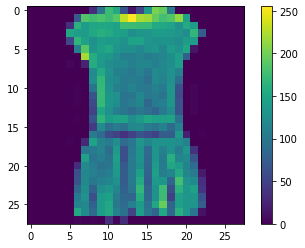

In [125]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

픽셀 값을 [0,255]에서 [0,1]로 조정

In [126]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### Q. 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력하시오.

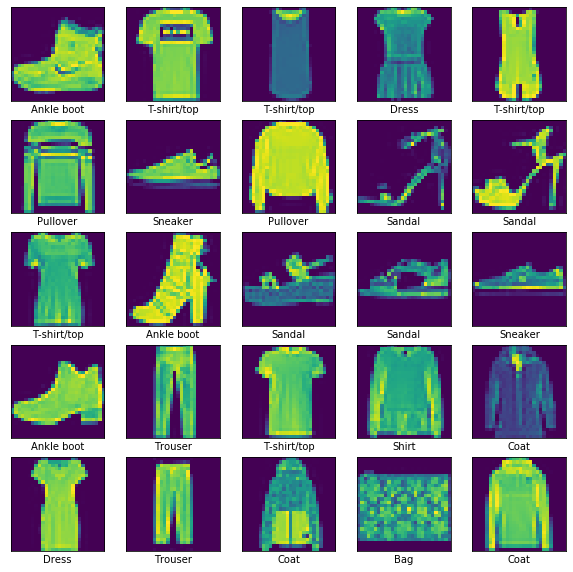

In [127]:
plt.figure(figsize=(10,10))
for i in range(25):
    # your code
    # 5x5 형태로 이미지를 클래스 이름과 함께 출력
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

### 모델 구성

#### Q. `tf.keras.layers.Dense`함수를 이용해서 Fully Connected Layer를 구성해 보시오.

In [139]:
model = keras.Sequential([
    # your code # input layer,
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # your code # hidden layer,
    tf.keras.layers.Dense(128,activation='relu'),
    # your code # output layer
    tf.keras.layers.Dense(10,activation='softmax')
])

#### Q. 훈련에 필요한 Optimizer, Loss, Metrics 설정

In [141]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련

#### Q. 모델을 훈련하기 위해 training set, label, epoch 등을 지정하시오.

In [142]:
model.fit(train_images,train_labels,epochs =5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4992 - accuracy: 0.8263
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3749 - accuracy: 0.8656
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3350 - accuracy: 0.8773
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3125 - accuracy: 0.8851
Epoch 5/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2937 - accuracy: 0.8907


### 테스트 성능 측정 (정확도)

#### Q. 테스트 모드에서 모델의 Loss와 Metric을 확인하시오.

In [144]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('\n테스트 정확도:', test_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3486 - accuracy: 0.8739

테스트 정확도: 0.8739


### 예측 만들기

#### Q.  테스트 세트에 있는 각 이미지의 레이블을 예측해보시오

In [152]:
predictions = model.predict(test_images)
np.argmax(predictions[0])

9

In [153]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

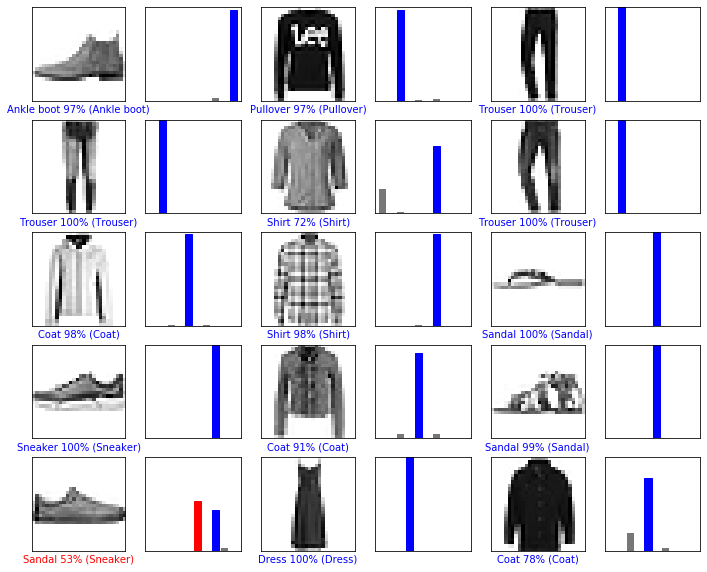

In [154]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()